a general outline of the perceptron algorithm:

- Initialize the weight vector w and bias term b to zeros or random values.
- Iterate over the training data points (x, y), where x is the feature vector and y is the label (either 1 or -1).
- Calculate the output of the perceptron for the input vector x by computing the dot product of w and x and adding b. The output is y_hat.
- Update the weight vector and bias term based on the error between the predicted output y_hat and the actual label y. The update rule is:
- w = w + learning_rate * y * x
- b = b + learning_rate * y
where learning_rate is a hyperparameter that controls the step size of the updates.
- Repeat steps 2-4 until convergence or a maximum number of iterations is reached.

In [3]:
import cupy as cp
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [4]:
# Load data from CSV file
data = pd.read_csv('annotated_points_np_200.csv')

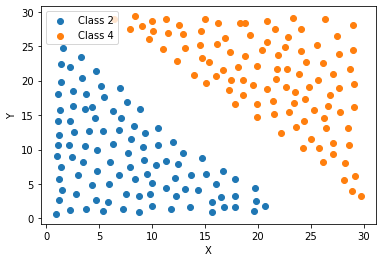

In [5]:
# Extract the points labeled as class 2 and class 4
class_2_points = data[data['labels'] == 2]
class_4_points = data[data['labels'] == 4]

# Create a scatterplot of the two classes
plt.scatter(class_2_points['x'], class_2_points['y'], label='Class 2')
plt.scatter(class_4_points['x'], class_4_points['y'], label='Class 4')

# Add axis labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

In [6]:
# Extract the features and labels
features = data[['x', 'y']].values
labels = data['labels'].values

# Convert the data to cupy arrays
features = np.array(features)
labels = np.array(labels)

# # Normalize the features
features = (features - features.mean(axis=0)) / features.std(axis=0)


In [7]:
for i in range(len(labels)):
    if labels[i]==2:
        labels[i]=-1
    else:
        labels[i]=1
# Shuffle the data
np.random.seed(42)
shuffle_idx = np.random.permutation(len(features))
features = features[shuffle_idx]
labels = labels[shuffle_idx]

# # Split the data into training, validation, and testing sets
# train_size = int(0.6 * len(features))
# val_size = int(0.2 * len(features))
# train_features, train_labels = features[:train_size], labels[:train_size]
# val_features, val_labels = features[train_size:train_size+val_size], labels[train_size:train_size+val_size]
# test_features, test_labels = features[train_size+val_size:], labels[train_size+val_size:]


In [13]:
def linear_classifier(X, y,w_init='zeros', learning_rate=0.01):
   # Initialize weights based on the specified method
    if w_init == 'zeros':
        weights = np.zeros(X.shape[1])
    elif w_init == 'random':
        weights = np.random.rand(X.shape[1])
    elif w_init == 'from_data':
        weights = np.linalg.pinv(X) @ y
    bias = 0.0
        
    converged = False
    while not converged:
        error_count = 0
        for i in range(len(X)):
            x = X[i]
            y_true = y[i]
            y_pred = np.dot(x, weights) + bias
            if y_true * y_pred <= 0:
                weights += learning_rate * y_true * x
                bias += learning_rate * y_true
                error_count += 1
            
        if error_count == 0:
            converged = True
    
    # Compute the decision boundary
    xx = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yy = -(weights[0]/weights[1]) * xx - (bias/weights[1])
    
    # Return the decision boundary and the trained weights and bias
    return xx, yy, weights, bias


### Linear Classifier for the zeros initialisation of weights

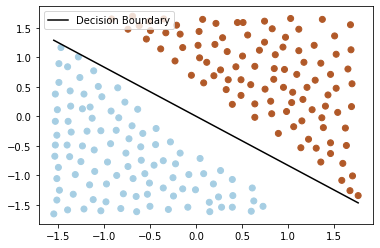

In [14]:
xx, yy, weights, bias = linear_classifier(features, labels,w_init='zeros')

# Plot the decision boundary and the data
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.legend()
plt.show()


### Linear classifier for random initialisation of weights

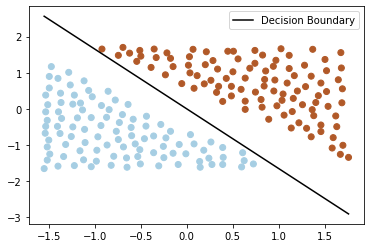

In [15]:
xx, yy, weights, bias = linear_classifier(features, labels,w_init='random')

# Plot the decision boundary and the data
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.legend()
plt.show()

### Linear classifier for data initialisation of weights

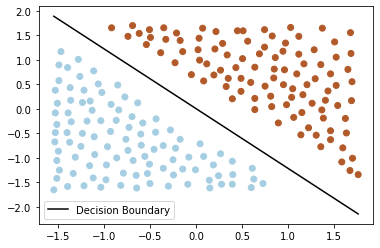

In [17]:
xx, yy, weights, bias = linear_classifier(features, labels,w_init='from_data')

# Plot the decision boundary and the data
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.legend()
plt.show()